# **Project Name**    - 🛒 Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce




##### **Project Type**    -
🧠 Problem Type:

Unsupervised Machine Learning – Clustering

Collaborative Filtering – Recommendation System

##### **Contribution**    - Individual
##### **Team Member 1 -Chandraprakash kahar


# **Project Summary -**

🧠 Project Summary: Customer Segmentation & Product Recommendation System Using Transaction Data

In today’s rapidly evolving e-commerce landscape, understanding customer behavior is critical to maintaining competitiveness and enhancing user satisfaction. This project focuses on leveraging transactional data from an online retail platform to extract valuable business insights and develop intelligent data-driven solutions.

The core objectives of this project include analyzing customer purchasing patterns, segmenting customers using RFM (Recency, Frequency, Monetary) analysis, and implementing a collaborative filtering-based product recommendation system. By applying unsupervised and recommendation learning techniques, the project identifies high-value customer groups, personalizes product suggestions, and supports strategic decision-making across various business functions.



---



🔍 Key Components:


RFM Analysis: To segment customers into meaningful clusters for better targeting.

Customer Clustering: Using K-Means or Hierarchical Clustering to group similar customers.

Collaborative Filtering: To generate personalized product recommendations based on user behavior similarity.

Visualization & Insights: Interactive dashboards and plots for business understanding.


---




💼 Real-Time Business Applications:
🎯 Targeted Marketing Campaigns through precise customer segmentation.

🛍️ Personalized Recommendations to boost user engagement and conversion rates.

⚠️ Churn Prediction by identifying at-risk customer segments.

💰 Dynamic Pricing Models guided by purchasing trends.

📦 Inventory Optimization aligned with customer demand analytics.

This end-to-end machine learning pipeline not only showcases proficiency in data preprocessing, clustering, and recommender systems but also demonstrates a strong understanding of applying ML to solve real-world business problems effectively.

# **GitHub Link -**

Google Colab code Github Link :

Streamlit App code Github Link : https://github.com/Sandruez/Streamlit-shopper-spectrum-app/tree/master

Streamlit App link:  https://shopper-app-chandraprakashkahar.streamlit.app/

# **📌Problem Statement**


In the fast-paced world of e-commerce, understanding customer behavior is key to driving growth. This project aims to analyze online retail transaction data to segment customers using RFM analysis and build a collaborative filtering-based recommendation system. The goal is to uncover actionable insights, enhance personalization, and support data-driven marketing, retention, and inventory strategies.

# 🔧 Environment Setup

Run the cell below to install all required Python libraries and download NLP resources for sentiment analysis and clustering. This will prevent any missing module errors.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# 📦 Install Required Libraries
!pip install -q textblob nltk wordcloud scikit-learn-extra kneed


# 📚 Import Common Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ⚙️ Sklearn Libraries
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score



print("✅ Setup complete! All libraries installed and ready.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.2 MB/s eta 0:00:00
✅ Setup complete! All libraries installed and ready.


### Dataset Loading

In [2]:

# Try loading from local directory
if os.path.exists("online_retail.csv"):
    online_retail_df = pd.read_csv("online_retail.csv")
else:
    from google.colab import drive
    drive.mount('/content/drive')
    online_retail_df = pd.read_csv('/content/drive/MyDrive/Labmentix intern projects/shopper spectrum/online_retail.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View


# 📌Dataset  features Description
### Column - Description of column or feature


InvoiceNo - Transaction number

StockCode - Unique product/item code

Description - Name of the product

Quantity - Number of products purchased

InvoiceDate - Date and time of transaction (2022–2023)

UnitPrice - Price per product

CustomerID - Unique identifier for each customer

Country - Country where the customer is based



In [3]:
# Dataset First Look
#first Look of online_retail_df dataframe
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
online_retail_df.shape
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# information about datafram..
online_retail_df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [6]:
## Transitions who are not valid acc to Dataset..
online_retail_df['InvoiceNo'].str.startswith('C').value_counts()

,count
InvoiceNo,
False,532621
True,9288


In [7]:
## removing Invslid transitions...
new_df=online_retail_df[online_retail_df['InvoiceNo'].str.startswith('C')==False]
new_df.InvoiceNo.str.startswith('C').value_counts()

,count
InvoiceNo,
False,532621


In [8]:
## Cheking for Duplicate rows
online_retail_df.drop_duplicates(keep='last').duplicated().sum()

np.int64(0)

## Step 2: 📌 Data Preprocessing:

✅ Remove rows with missing CustomerID

✅Exclude cancelled invoices (InvoiceNo starting with 'C')

✅Remove negative or zero quantities and prices

✅Identify and filing  missing values

✅Removing duplicates entries in dataframe


### 2.1 Identify missing values, duplicates, and unusual records.

In [9]:
# dealing with duplicate row/ tuples in dataframe
print("Count duplicate entries /Tuples: ",online_retail_df.duplicated().sum())

#Removing Duplicate enties.. Using pd.drop_duplicates() method
online_retail_df=online_retail_df.drop_duplicates(keep='last')

print("Count duplicate after removing entries /Tuples: ",online_retail_df.duplicated().sum())

Count duplicate entries /Tuples:  5268
Count duplicate after removing entries /Tuples:  0


### 2.2 Remove rows with missing CustomerID

In [10]:
## Remove rows with msising CustomerID
print("Count of missing CustomerID feature values Rows :",online_retail_df.CustomerID.isna().sum())

#Removing missing CustomerID feature  having NAN entiy .. Using pd.dropna()
online_retail_df = online_retail_df.dropna(subset=["CustomerID"] ,axis=0)

print("Count of missing CustomerID feature values: ",online_retail_df.CustomerID.isna().sum())
online_retail_df.shape

Count of missing CustomerID feature values Rows : 135037
Count of missing CustomerID feature values:  0


(401604, 8)

### 2.3 Excluding cancelled invoices (InvoiceNo starting with 'C')


In [11]:
## Remove rows with InvoiceNo starting with 'C'
print("Count of rows having InvoiceNo starting with 'C' ",online_retail_df['InvoiceNo'].str.startswith('C').sum())

#Removing Remove rows with InvoiceNo starting with 'C'..
online_retail_df = online_retail_df[ online_retail_df['InvoiceNo'].str.startswith("C")==False]

print("Count of rows having InvoiceNo starting with 'C' ",online_retail_df['InvoiceNo'].str.startswith('C').sum())


Count of rows having InvoiceNo starting with 'C'  8872
Count of rows having InvoiceNo starting with 'C'  0


### 2.4 Removing negative or zero quantities and prices entries

In [12]:
#Removing negative or zero quantities and prices entries

cnt=len(online_retail_df[(online_retail_df.Quantity <= 0) | (online_retail_df.UnitPrice <= 0.0) ])
print("Count of rows having negative or zero quantities and prices entries: ",cnt)

#Removing negative or zero quantities and prices entries..
online_retail_df=online_retail_df[(online_retail_df.Quantity > 0) & (online_retail_df.UnitPrice > 0.0) ]

val=len(online_retail_df[(online_retail_df.Quantity <= 0) | (online_retail_df.UnitPrice <= 0.0) ])
print("Count of rows having negative or zero quantities and prices entries: ",val)
online_retail_df.shape

Count of rows having negative or zero quantities and prices entries:  40
Count of rows having negative or zero quantities and prices entries:  0


(392692, 8)

In [13]:
## Removing while spaces from itemp descriptions ..


online_retail_df = online_retail_df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)


In [14]:
# def strip_desc(itemp_desc):
#   return itemp_desc.strip()
# temp=df_clean.Description
# cnt =0
# for item in temp:
#   if item[len(item)-1]==' ' or item[0]==' ':
#     cnt+=1

# print(temp.nunique())
# online_retail_df.Description.nunique()
# cnt


# Step 3: 📌 Exploratory Data Analysis (EDA):
* Analyze transaction volume by country

* Identify top-selling products

* Visualize purchase trends over time

* Inspect monetary distribution per transaction and customer

* RFM distributions

* Elbow curve for cluster selection

* Customer cluster profiles

* Product recommendation heatmap / similarity matrix



### 3.1 Analyze transaction volume by country

In [15]:
# transaction_count_by_country = online_retail_df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
# transaction_count_by_country.head(10
#                                   )
# transaction_count_by_country.values

/tmp/ipython-input-1260951342.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')


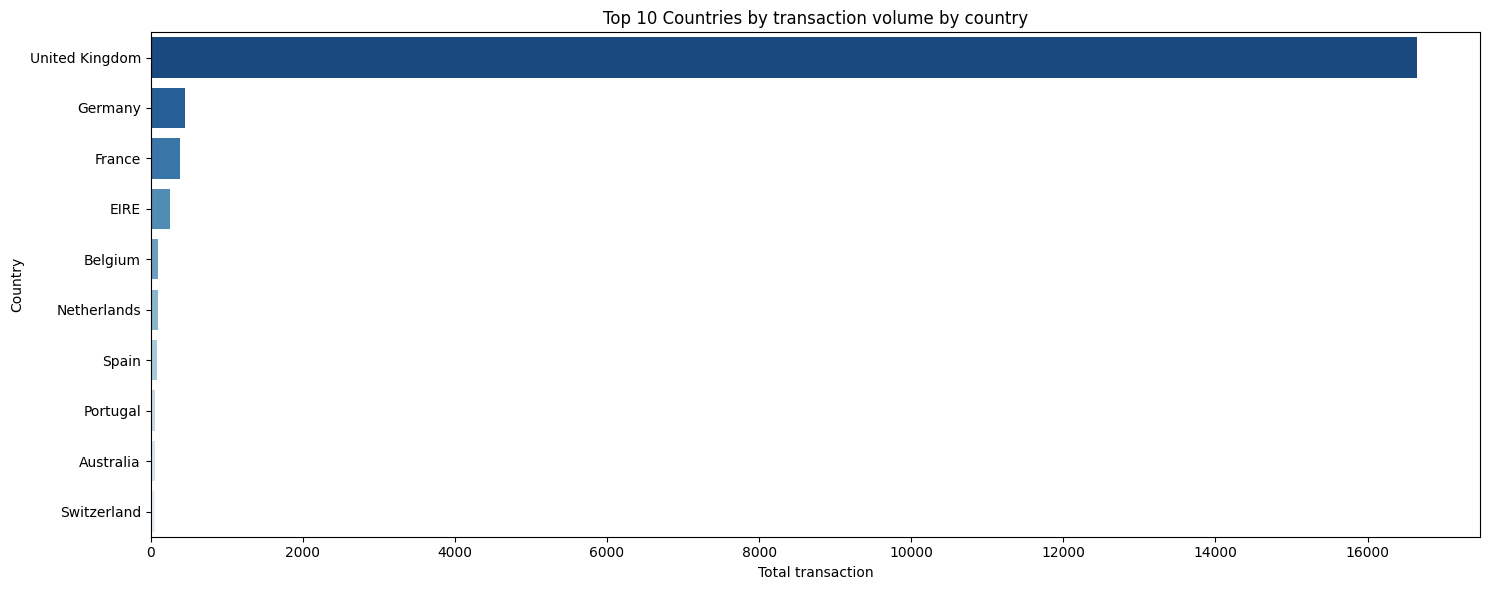

Top 10 Countries by transaction volume by country:
 ['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium', 'Netherlands', 'Spain', 'Portugal', 'Australia', 'Switzerland']


In [16]:
##Visualisation of top 10 transitions volume vs country..

transaction_count_by_country = online_retail_df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
transaction_count_by_country.head(10)


top_countries = transaction_count_by_country.head(10)

plt.figure(figsize=(15,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.title('Top 10 Countries by transaction volume by country')
plt.xlabel('Total transaction')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

print("Top 10 Countries by transaction volume by country:\n",list(top_countries.index))

/tmp/ipython-input-869373364.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')


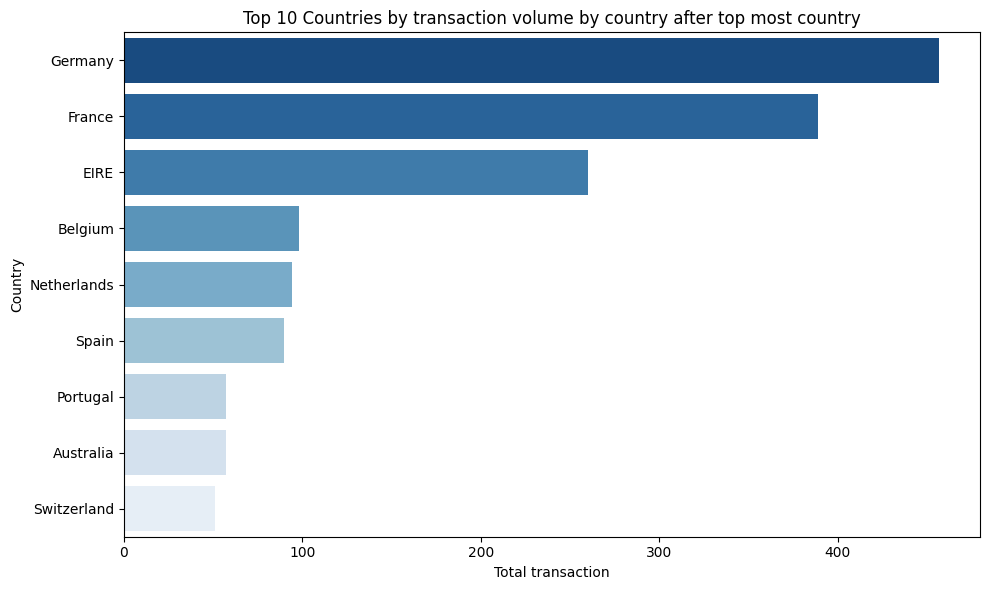

In [17]:
transaction_count_by_country = online_retail_df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
transaction_count_by_country.head(10)


top_countries = transaction_count_by_country.head(10)[1:10]

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.title('Top 10 Countries by transaction volume by country after top most country')
plt.xlabel('Total transaction')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## ▶ Insights from Transaction Volume by Country
 * Top Markets – Identify countries with the highest sales or usage.

 * Growth Opportunities – Spot emerging markets with rising volumes.

* Low Engagement – Find underperforming countries needing attention.

According to this data set:-

Top 10 Countries by transaction volume by country:


 ['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium', 'Netherlands', 'Spain', 'Portugal', 'Australia', 'Switzerland']




### 3.2 Identify top-selling products  

In [18]:
## Group by Product (Description) and Sum Quantity
top_products_by_quantity = (
    online_retail_df.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
)

top_products_by_quantity

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
JUMBO BAG RED RETROSPOT,46078
WHITE HANGING HEART T-LIGHT HOLDER,36706
...,...
JARDIN ETCHED GLASS BUTTER DISH,1
JADE CRYSTAL+GLASS BRACELET,1
PINK CRYSTAL GUITAR PHONE CHARM,1


/tmp/ipython-input-1560404051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_by_quantity.head(20).values,


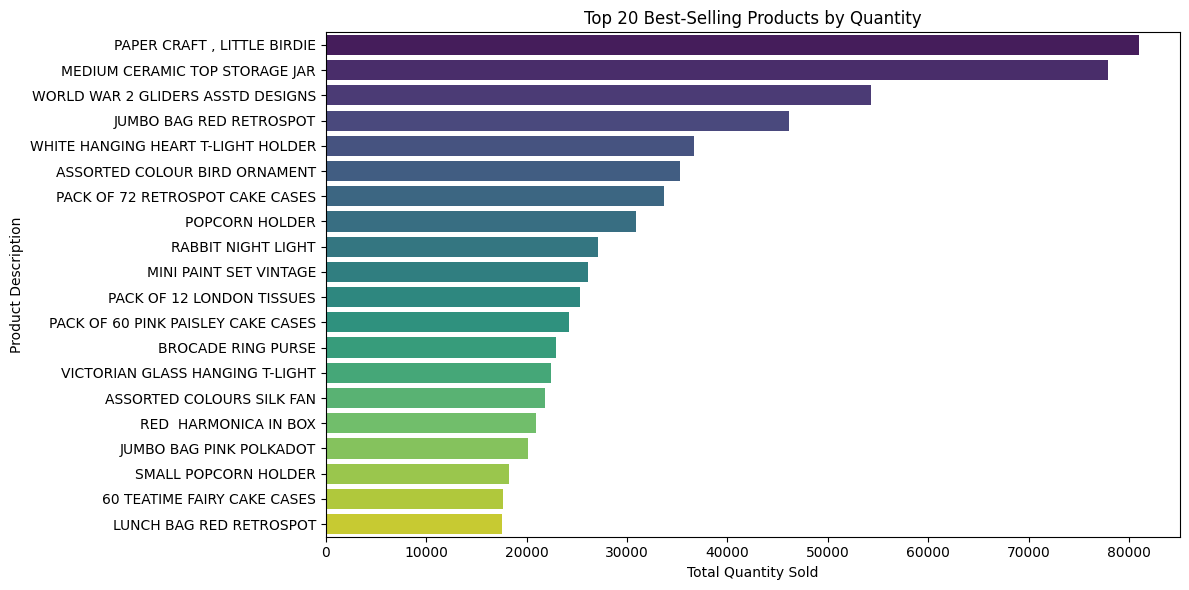

Top 20 Best-Selling Products by Quantity
 ['PAPER CRAFT , LITTLE BIRDIE', 'MEDIUM CERAMIC TOP STORAGE JAR', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'JUMBO BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER', 'ASSORTED COLOUR BIRD ORNAMENT', 'PACK OF 72 RETROSPOT CAKE CASES', 'POPCORN HOLDER', 'RABBIT NIGHT LIGHT', 'MINI PAINT SET VINTAGE', 'PACK OF 12 LONDON TISSUES', 'PACK OF 60 PINK PAISLEY CAKE CASES', 'BROCADE RING PURSE', 'VICTORIAN GLASS HANGING T-LIGHT', 'ASSORTED COLOURS SILK FAN', 'RED  HARMONICA IN BOX', 'JUMBO BAG PINK POLKADOT', 'SMALL POPCORN HOLDER', '60 TEATIME FAIRY CAKE CASES', 'LUNCH BAG RED RETROSPOT']


In [19]:
## Display Top 20 Best Sellers (by Quantity)

# Plot top  by quantity
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_by_quantity.head(20).values,
            y=top_products_by_quantity.head(20).index,
            palette='viridis')
plt.title('Top 20 Best-Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

print("Top 20 Best-Selling Products by Quantity\n",list(top_products_by_quantity.head(20).index))

## ▶  Insights from Identifying Top-Selling Products
* Customer Preferences: Highlights the most purchased items, revealing what customers truly value.

* Inventory Optimization: Helps maintain stock levels of high-demand products and avoid overstocking low-performers.

* Marketing Strategy: Guides promotional efforts by focusing on proven best-sellers.

* Cross-Selling Opportunities: Enables bundling of popular items with related products to boost average order value.

* Trend Identification: Detects emerging product trends for timely merchandising decisions.

* Revenue Contribution: Pinpoints products driving the highest revenue, aiding profit-focused planning.

According to the Dataset:-

Top 10 Best-Selling Products by Quantity

 ['PAPER CRAFT , LITTLE BIRDIE', 'MEDIUM CERAMIC TOP STORAGE JAR', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'JUMBO BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER', 'ASSORTED COLOUR BIRD ORNAMENT', 'PACK OF 72 RETROSPOT CAKE CASES', 'POPCORN HOLDER', 'RABBIT NIGHT LIGHT', 'MINI PAINT SET VINTAGE', 'PACK OF 12 LONDON TISSUES', 'PACK OF 60 PINK PAISLEY CAKE CASES', 'BROCADE RING PURSE', 'VICTORIAN GLASS HANGING T-LIGHT', 'ASSORTED COLOURS SILK FAN', 'RED  HARMONICA IN BOX', 'JUMBO BAG PINK POLKADOT', 'SMALL POPCORN HOLDER', '60 TEATIME FAIRY CAKE CASES', 'LUNCH BAG RED RETROSPOT']


# 3.3 Visualizing purchase trends over time


## To visualize purchase trends over time from  dataset, we can analyze:

📆 Total quantity or revenue over time (daily, weekly, monthly)

🛍️ Seasonality or peak shopping periods



In [20]:
#Step 1: Convert InvoiceDate to datetime
online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'])

# Step 2: Create a TotalPrice column (for revenue trend)
online_retail_df['TotalPrice'] = online_retail_df['Quantity'] * online_retail_df['UnitPrice']

#Step 3: Set Date as Index (for resampling)
df_time = online_retail_df.set_index('InvoiceDate')
df_time.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice
InvoiceDate,,,,,,,,
2022-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2022-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2022-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2022-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2022-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


📈 Option 1: Plot Revenue Trend (Daily or Monthly)

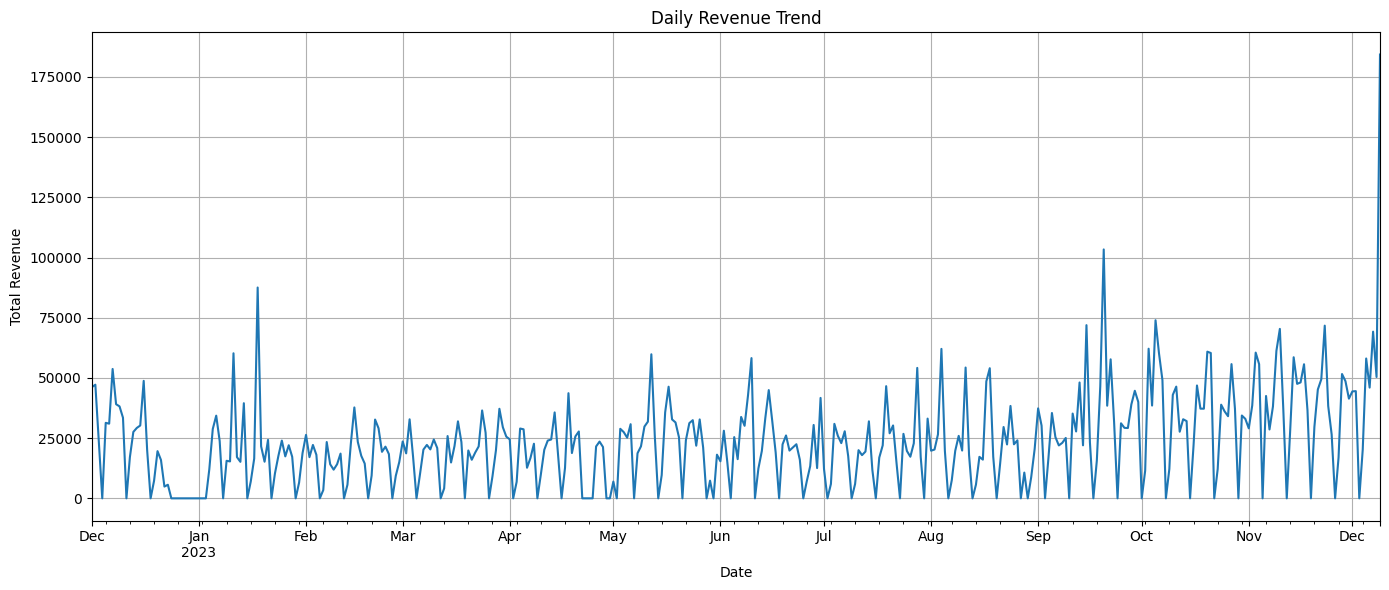

In [21]:
## Revenue Trend (Daily)

# Group by day
daily_revenue = df_time['TotalPrice'].resample('D').sum()

plt.figure(figsize=(14,6))
daily_revenue.plot()
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1201984214.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_revenue = df_time['TotalPrice'].resample('M').sum()


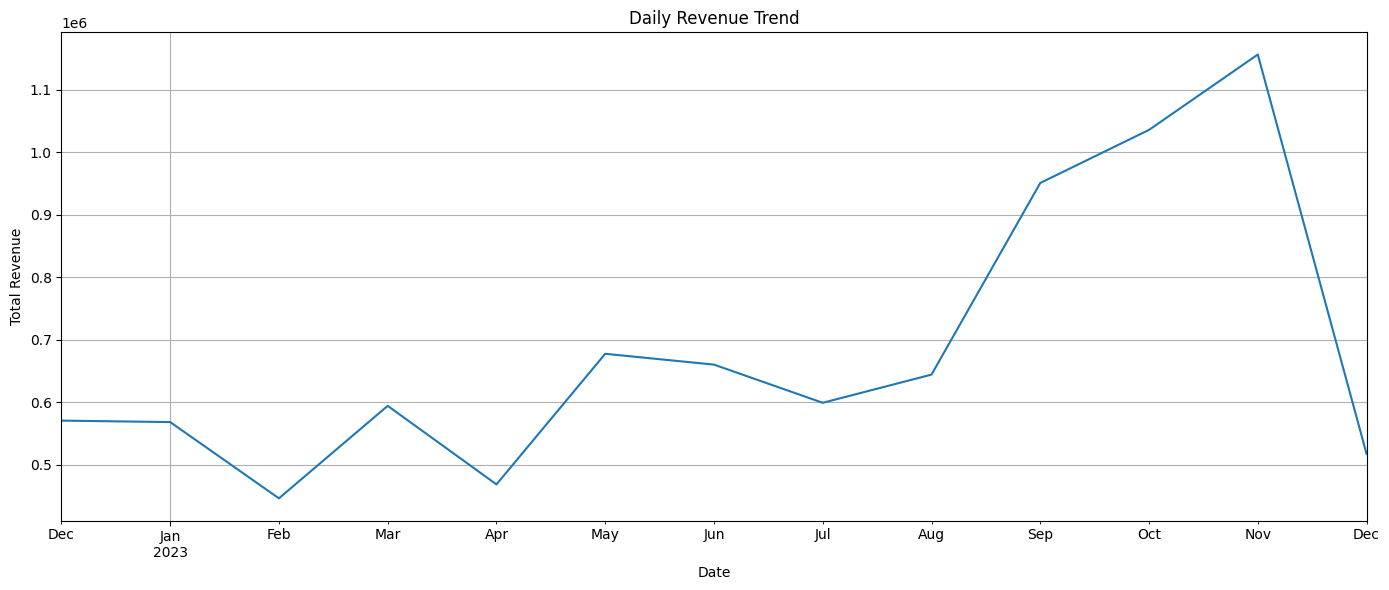

In [22]:
## Revenue Trend (Monthly)

# Group by day
daily_revenue = df_time['TotalPrice'].resample('M').sum()

plt.figure(figsize=(14,6))
daily_revenue.plot()
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Option 2: Plot Purchase Volume Trend (Quantity)

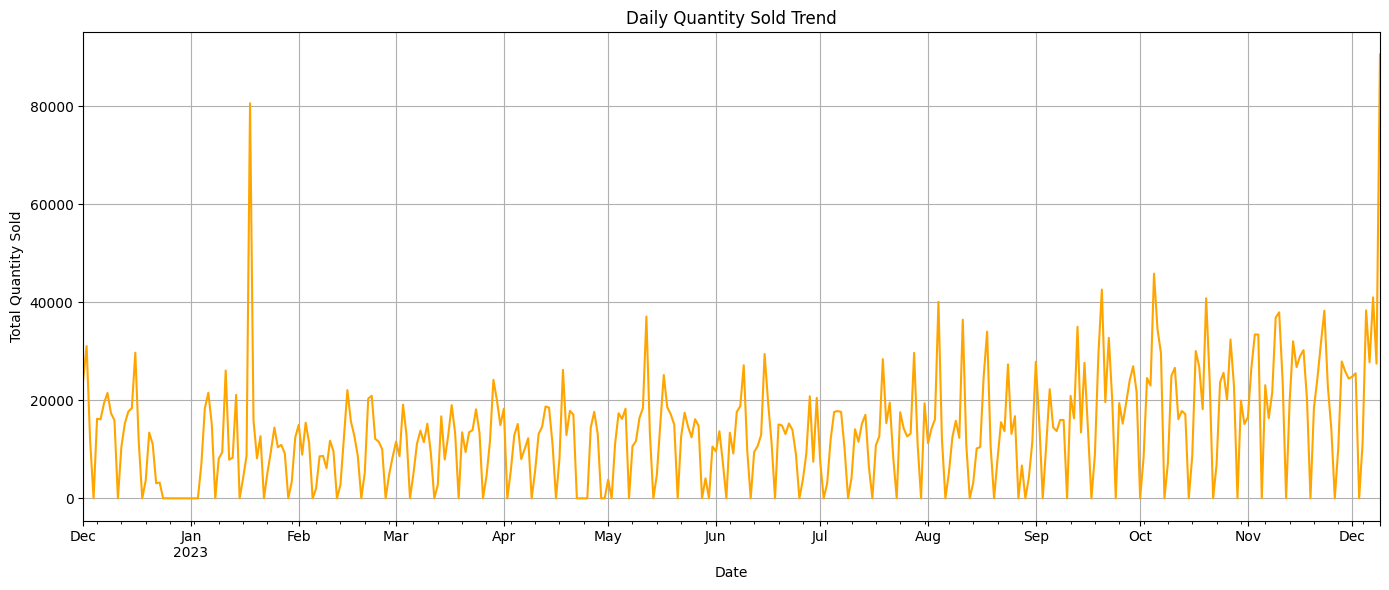

In [23]:

## Plot Purchase Volume  Daily Trend (Quantity)

daily_quantity = df_time['Quantity'].resample('D').sum()

plt.figure(figsize=(14,6))
daily_quantity.plot(color='orange')
plt.title('Daily Quantity Sold Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1209614805.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_quantity = df_time['Quantity'].resample('M').sum()


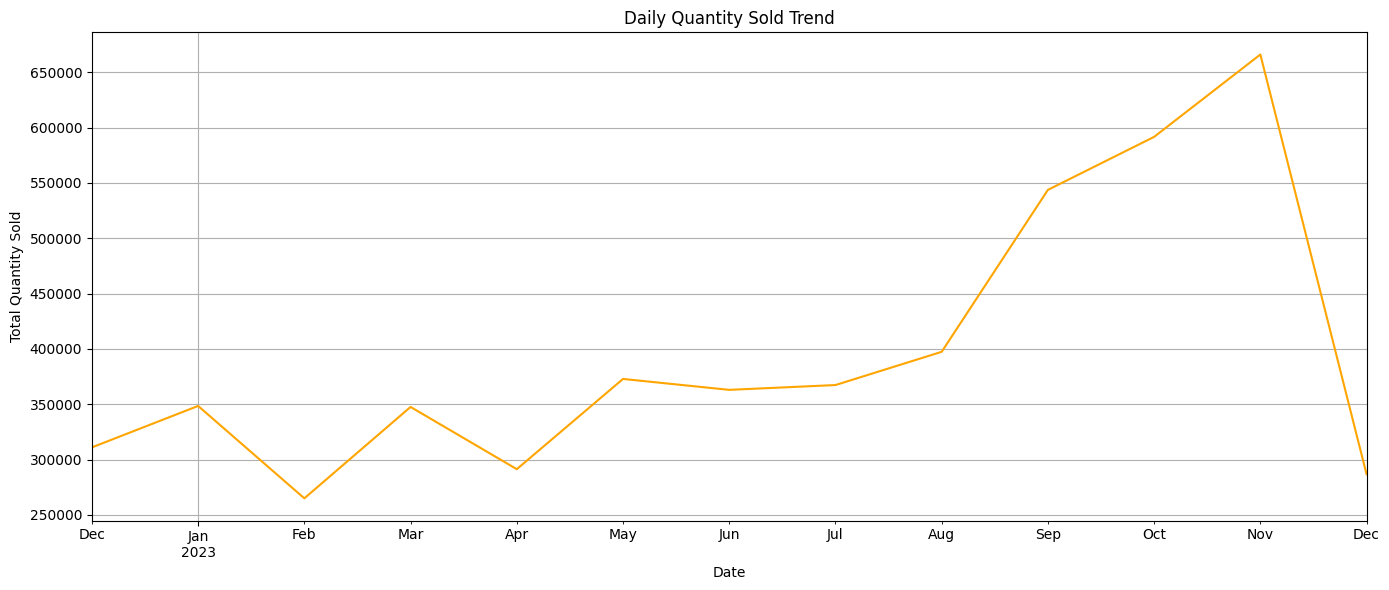

In [24]:
## Plot Purchase Volume  Monthy Trend (Quantity)

daily_quantity = df_time['Quantity'].resample('M').sum()

plt.figure(figsize=(14,6))
daily_quantity.plot(color='orange')
plt.title('Daily Quantity Sold Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': '7-Day Rolling Average Revenue'}, xlabel='InvoiceDate'>

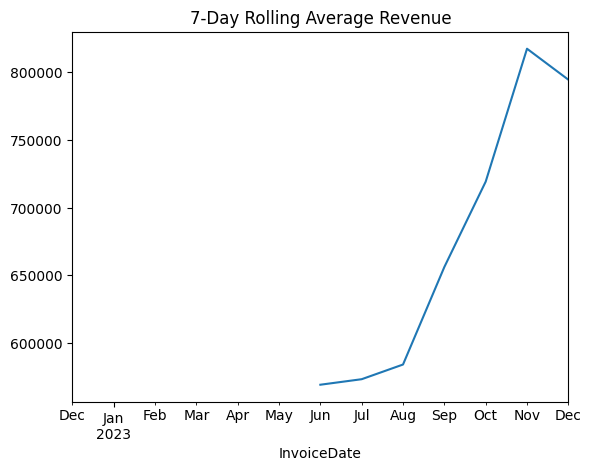

In [25]:
daily_revenue.rolling(7).mean().plot(title='7-Day Rolling Average Revenue')



## ▶ Insights from Purchase Trends Over Time

* Sales Seasonality:
Identify peak shopping periods (e.g., holidays, weekends, end-of-month spikes).

* Growth Trends:
See if overall sales or order volume is increasing, stable, or declining over time.

* Marketing Impact:
Spot sales jumps during promotions, ad campaigns, or influencer pushes.

* Product Lifecycle Patterns:
Observe how demand for new vs. older products changes over time.

* Customer Buying Behavior:
Understand how often and when customers return to purchase (daily/weekly/monthly trends).

* Platform or Region Shifts:
Detect changes in purchase patterns by platform (web vs. mobile) or by region.

* Inventory Planning Signals:
Forecast future demand based on past trends to prevent overstock or stockouts.



### 3.4 Inspect monetary distribution per transaction and customer


#### 🧾 1. Monetary Distribution per Transaction (Invoice)


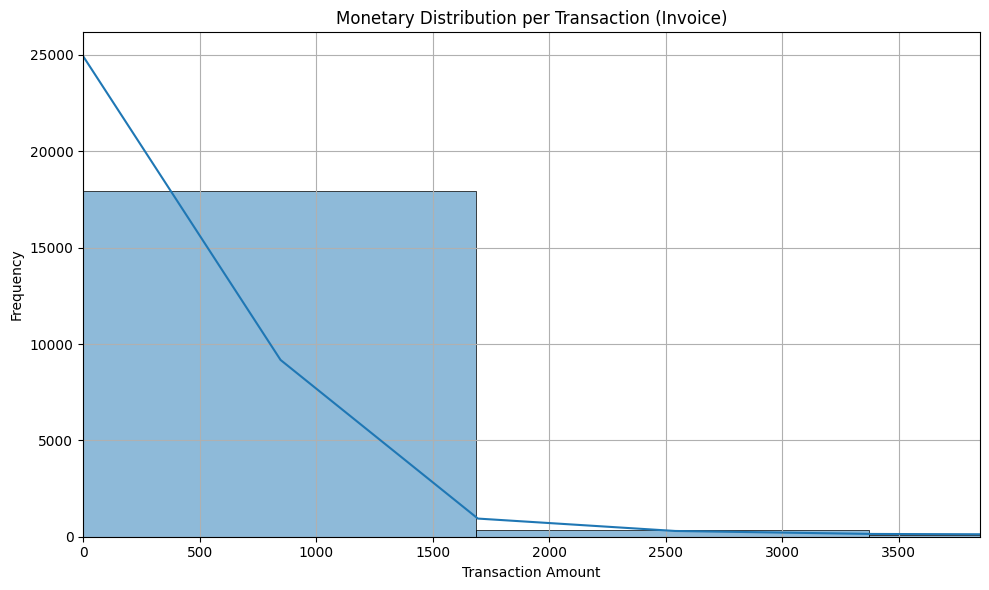

In [26]:
# Step 1: Add a TotalPrice Column //already Done

# online_retail_df['TotalPrice'] = online_retail_df['Quantity'] * online_retail_df['UnitPrice']

# step 2 :  Grouping  by InvoiceNo
invoice_amounts = online_retail_df.groupby('InvoiceNo')['TotalPrice'].sum()

#Visualize Transaction-Level Distribution

plt.figure(figsize=(10,6))
sns.histplot(invoice_amounts, bins=100, kde=True)
plt.title('Monetary Distribution per Transaction (Invoice)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xlim(0, invoice_amounts.quantile(0.99))  # limit outliers
plt.grid(True)
plt.tight_layout()
plt.show()

## ▶  Key Insights
* Customer Spending Behavior:
Understand how much customers typically spend per order (low, mid, high spenders).

* evenue Concentration:
Few large transactions might account for most of the revenue (80/20 rule).

* Segmentation Opportunity:
Use monetary value for RFM (Recency, Frequency, Monetary) segmentation to target high-value customers.

* Fraud or Error Detection:
Very high or very low transaction values may signal anomalies or data entry issues.

* Product/Bundle Effectiveness:
See if bundled or upsold products increase average transaction value.

### 👤 2. Monetary Distribution per Customer

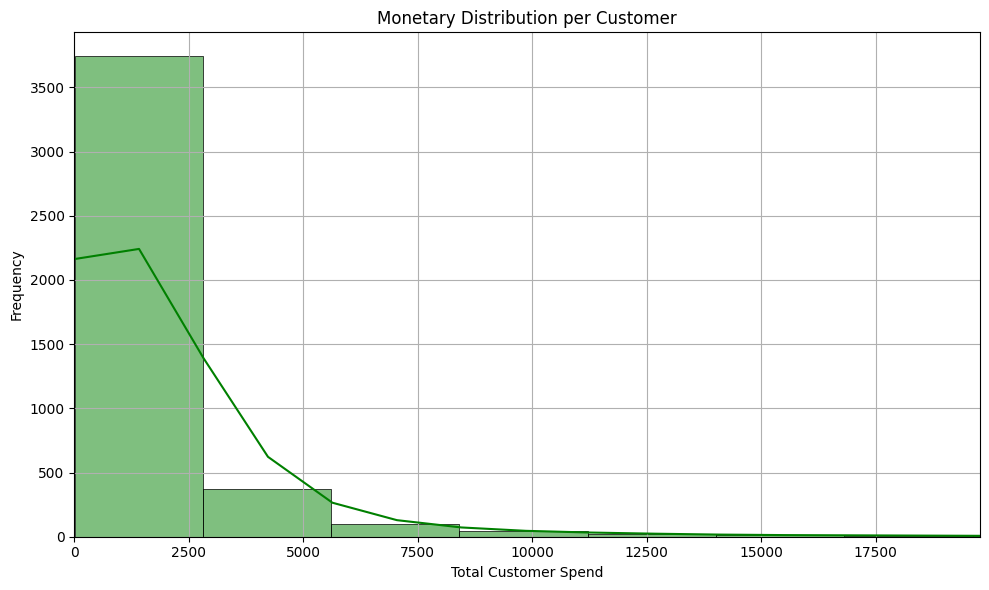

In [27]:

##  Group by CustomerID

customer_spending = online_retail_df.groupby('CustomerID')['TotalPrice'].sum()


#  Visualize Customer-Level Spending

plt.figure(figsize=(10,6))
sns.histplot(customer_spending, bins=100, kde=True, color='green')
plt.title('Monetary Distribution per Customer')
plt.xlabel('Total Customer Spend')
plt.ylabel('Frequency')
plt.xlim(0, customer_spending.quantile(0.99))  # trim outliers for better scale
plt.grid(True)
plt.tight_layout()
plt.show()


## ▶ Key Insights
* Customer Spending Behavior:
Understand how much customers typically spend per order (low, mid, high spenders).

* Revenue Concentration:
Few large transactions might account for most of the revenue (80/20 rule).

* Segmentation Opportunity:
Use monetary value for RFM (Recency, Frequency, Monetary) segmentation to target high-value customers.

* Fraud or Error Detection:
Very high or very low transaction values may signal anomalies or data entry issues.

* Product/Bundle Effectiveness:
See if bundled or upsold products increase average transaction value.

### 3.5 RFM distributions

 Recency = Latest purchase date in dataset − Customer’s last purchase date


 Frequency = Number of transactions per customer


 Monetary = Total amount spent by customer

 #### 🧮 Step 1: Calculate RFM Values

In [28]:
# ➤ Define Snapshot Date
# This is the last date in the dataset (or one day after):
snapshot_date = online_retail_df['InvoiceDate'].max() + pd.Timedelta(days=1)

# ➤ Group by Customer to Calculate RFM
rfm = online_retail_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()
rfm


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4333,18280.0,278,1,180.60
4334,18281.0,181,1,80.82
4335,18282.0,8,2,178.05
4336,18283.0,4,16,2045.53


#### 📊 Step 2: Visualize RFM Distributions

 ▶ Recency Distribution

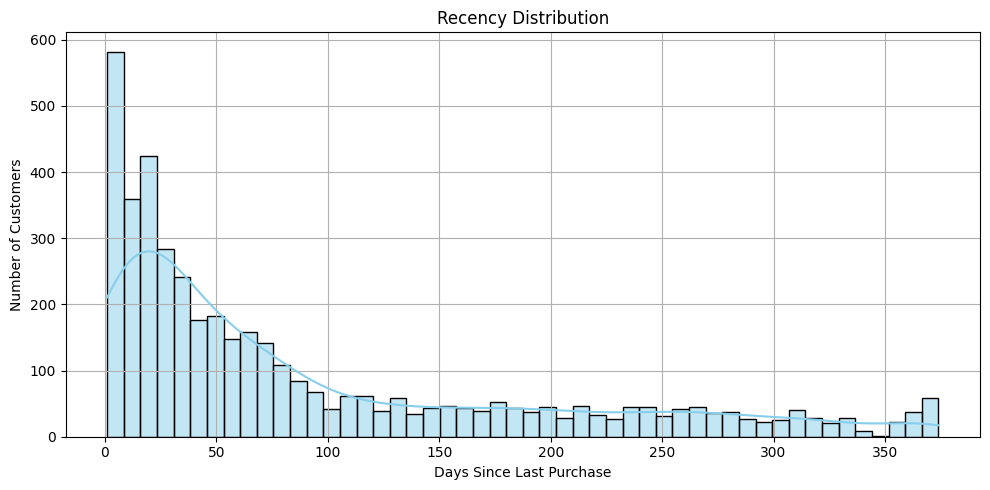

In [29]:
## Recency distribution along with number of customers
plt.figure(figsize=(10, 5))
sns.histplot(rfm['Recency'], bins=50, kde=True, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


## ▶ Key Insights
* Active vs. Dormant Customers:
High count in recent days = active base; high count in older ranges = inactive/dormant customers.

* Customer Retention Health:
A healthy business has a strong cluster of customers with low recency (e.g., <30 days).

* Re-engagement Opportunities:
Customers with high recency (e.g., >90 days) may need targeted win-back campaigns.

* Churn Risk Identification:
A growing number of long-inactive customers can indicate declining engagement or satisfaction.

▶ Frequency Distribution

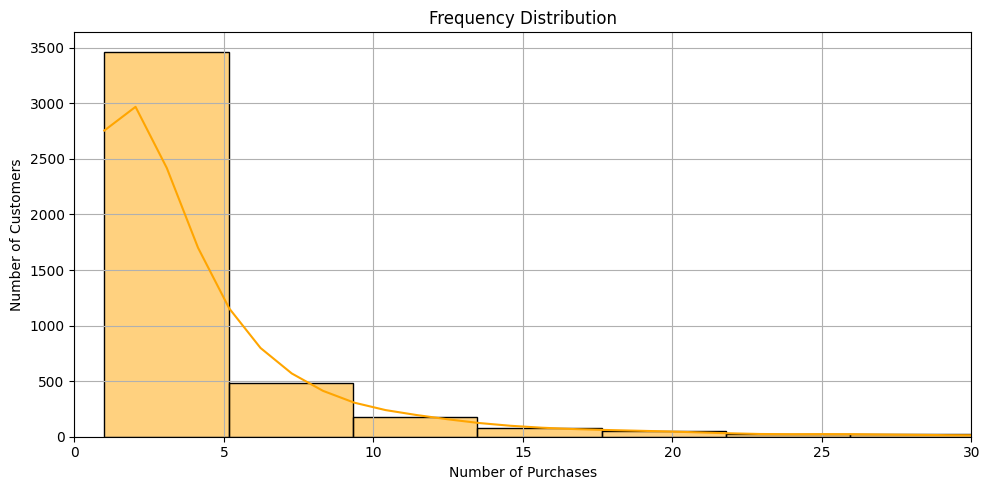

In [30]:

## Frequency distribution with Number of customers.

plt.figure(figsize=(10, 5))
sns.histplot(rfm['Frequency'], bins=50, kde=True, color='orange')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.xlim(0, rfm['Frequency'].quantile(0.99))  # remove extreme outliers
plt.grid(True)
plt.tight_layout()
plt.show()

  ▶ Monetary Distribution

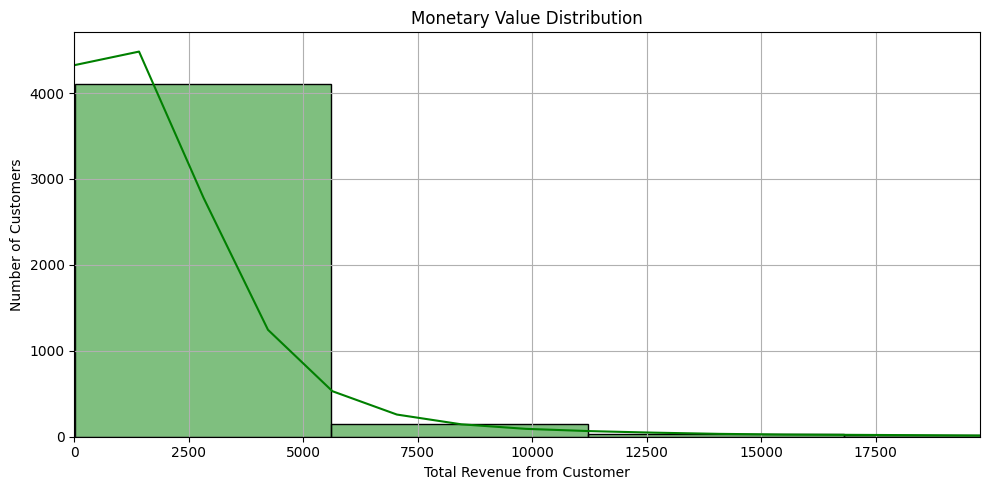

In [31]:

plt.figure(figsize=(10, 5))
sns.histplot(rfm['Monetary'], bins=50, kde=True, color='green')
plt.title('Monetary Value Distribution')
plt.xlabel('Total Revenue from Customer')
plt.ylabel('Number of Customers')
plt.xlim(0, rfm['Monetary'].quantile(0.99))  # trim outliers
plt.grid(True)
plt.tight_layout()
plt.show()

## ▶ Key Insights
* Customer Loyalty Levels:
High-frequency customers = loyal buyers; low frequency = one-time shoppers.

* Retention Strength:
A larger share of repeat buyers indicates stronger customer retention.

* Potential for Upselling:
Medium-frequency customers can be targeted for loyalty programs or incentives to increase their buying frequency.

* Churn Risk:
Customers with only 1 purchase may need nurturing to prevent churn.

### Product recommendation heatmap / similarity matrix visualisations..

#### ✅ 1. Build a Customer-Product Matrix


In [32]:
# Filter meaningful transactions (e.g., positive quantity)
df_filtered = online_retail_df[online_retail_df['Quantity'] > 0]

# Pivot table: rows = CustomerID, columns = Product, values = Quantity By using DF.pivot_table
customer_product_matrix = df_filtered.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)


#### ✅ 2. Compute Item-Item Cosine Similarity

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose so products are rows
product_similarity = cosine_similarity(customer_product_matrix.T)
# Convert to DataFrame for labeling
product_sim_df = pd.DataFrame(product_similarity,
                              index=customer_product_matrix.columns,
                              columns=customer_product_matrix.columns)


#### ✅ 3. Ploting a Heatmap of Product Similarity

🔍 Interpretation:
Darker values indicate higher similarity (closer to 1).

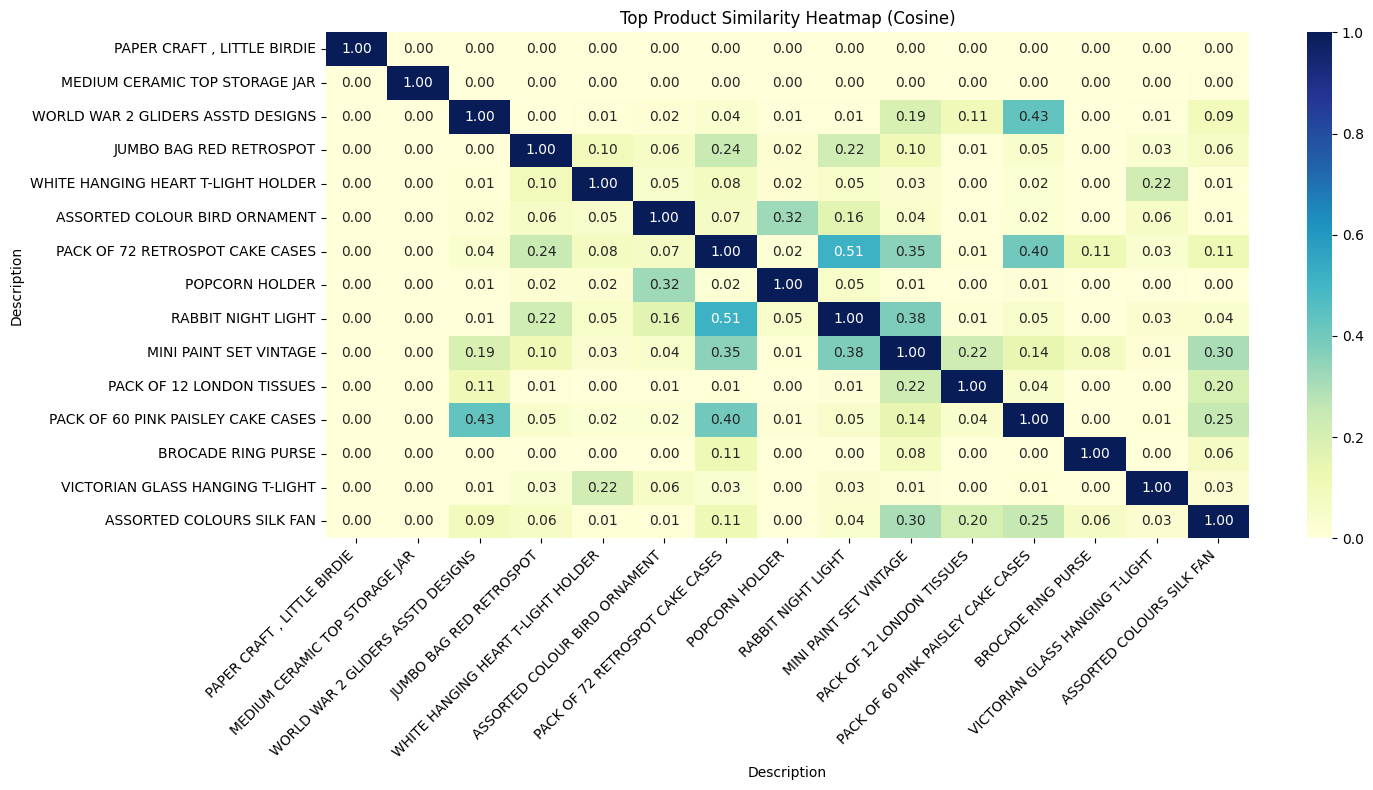

In [34]:

# Pick top N products for a readable heatmap
top_products = customer_product_matrix.sum().sort_values(ascending=False).head(15).index

# Slice the similarity matrix
top_sim_matrix = product_sim_df.loc[top_products, top_products]

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(top_sim_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Top Product Similarity Heatmap (Cosine)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## ▶ Key Insights You Can Extract
* Frequently Bought Together
High similarity scores suggest products are often purchased together — ideal for bundling or cross-selling.

* Product Substitutes:
Similar items may serve the same need — useful for recommendation engines or alternatives when out-of-stock.

* Category Clarity:
Heat clusters show natural grouping — verify if current product categories make sense or need realignment.

* Gap Identification:
Sparse or low-similarity areas might reveal untapped product relationships or categories needing more variety.

* Customer Journey Insight:
Understand how customers navigate between products — supports better site layout or filtering.


# Step 4 : 📌 Clustering Methodology

## Feature Engineering:

1️⃣ Calculate Recency = Latest purchase date in dataset − Customer’s last purchase date


 Calculate Frequency = Number of transactions per customer


 Calculate Monetary = Total amount spent by customer



2️⃣ Standardize/Normalize the RFM values


3️⃣ Choose Clustering Algorithm (KMeans, DBScan, Hierarchial etc)


 4️⃣ Use Elbow Method , Silhouette Score to decide the number of clusters


5️⃣ Run Clustring


Label the clusters by interpreting their RFM averages:

| Cluster   | Characteristics  | Segment Label|
|:---------|:--------:|---------:|
| High R , High F, High M| Regular frequent, recent,and big spenders|High-value|
| Medium F, Medium M    |  Steady purchasers but not premium        | Regular  |
| Low F, Low M, older R |Rare, occasional purchases                 |Occasional|
| High R, Low F, Low M  |Haven’t purchased in a long time           |  At-Ris  |

6️⃣ Visualize the clusters using a scatter plot or 3D plot of RFM scores.

7️⃣Save the best performing model for streamlit usage
  


## 1. Calculating RFM Value



In [35]:
# ➤ Define Snapshot Date
# This is the last date in the dataset (or one day after):


# snapshot_date = online_retail_df['InvoiceDate'].max() + pd.Timedelta(days=1)
# # ➤ Group by Customer to Calculate RFM

# rfm = online_retail_df.groupby('CustomerID').agg({
#     'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
#     'InvoiceNo': 'nunique',                                   # Frequency
#     'TotalPrice': 'sum'                                       # Monetary
# })
## RFm data frame ia already calulated in vsualisation section ..
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


## 2. Standardize/Normalize  the RFM Data (important for clustering)

In [36]:
## Standadizing/Normalising RFM values because KMeans model is a distance based model..
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])


## 3. Choose Clustering Algorithm (KMeans, DBScan, Hierarchial etc)

In [37]:
# !pip install kneed

## 4. Use Elbow Method , Silhouette Score to decide the number of clusters
(Elbow Method – WCSS vs K Plot)

📍 How to Interpret:

Look for the "elbow point" — where the WCSS starts to diminish more slowly.

That k is a good choice for the number of clusters (often between 3 and 6).



#### 4.1 Using Elbow Method along with Elbo curve

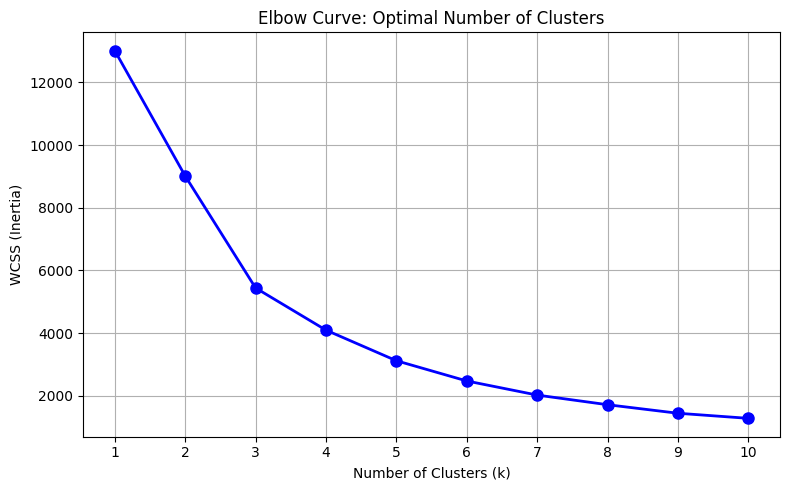

Optimal number of clusters: 4
silhouette score for k=4 (Number of clusters): 0.6162275299061803


In [39]:

from sklearn.cluster import KMeans
from kneed import KneeLocator



wcss = []  # Within-cluster sum of squares
K = range(1, 11)

for k in K:
    kmeans = KMeans(
    n_clusters=k,           # Determined via Elbow/Silhouette
    init='k-means++',       # Better initialization for faster, stable convergence
    n_init=30,              # Try 20 different initial centroids to avoid local minima
    max_iter=500,           # Higher iteration count to ensure convergence
    random_state=42,        # Reproducibility
    algorithm='lloyd'       # Default algorithm, good for RFM-like dense data
)

    kmeans.fit(rfm_scaled)
    # if k>1 :
    #     print(f"{k}:",silhouette_score(rfm_scaled,kmeans.predict(rfm_scaled)),"\n")
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Curve: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(K)
plt.grid(True)
plt.tight_layout()
plt.show()



knee = KneeLocator(K, wcss, curve='convex', direction='decreasing')
print("Optimal number of clusters:", knee.knee)
kmeans1 = KMeans(
    n_clusters=4,           # Determined via Elbow/Silhouette
    init='k-means++',       # Better initialization for faster, stable convergence
    n_init=30,              # Try 20 different initial centroids to avoid local minima
    max_iter=400,           # Higher iteration count to ensure convergence
    random_state=42,        # Reproducibility
    algorithm='lloyd'       # Default algorithm, good for RFM-like dense data
)
kmeans1.fit(rfm_scaled)
print("silhouette score for k=4 (Number of clusters):",silhouette_score(rfm_scaled,kmeans1.predict(rfm_scaled)))


### 4.2 Using silhouette scores  along with silhouette_score curve

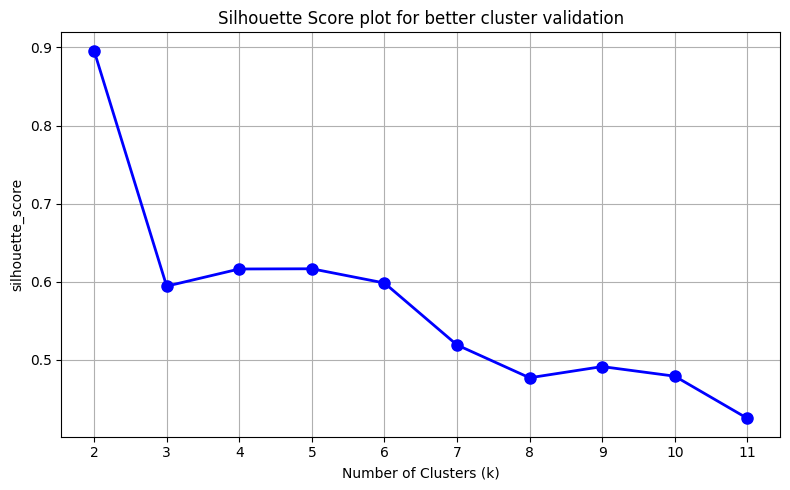

Optimal number of clusters: 3


In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


sill_scores = []  #silhouette scores list across no of clusters
K=range(2,12)

for k in K:
    kmeans = KMeans(
    n_clusters=k,           # Determined via Elbow/Silhouette
    init='k-means++',       # Better initialization for faster, stable convergence
    n_init=40,              # Try 20 different initial centroids to avoid local minima
    max_iter=500,           # Higher iteration count to ensure convergence
    random_state=42,        # Reproducibility
    algorithm='lloyd'       # Default algorithm, good for RFM-like dense data
    )
    kmeans.fit(rfm_scaled)
    score=silhouette_score(rfm_scaled,kmeans.labels_)
    sill_scores.append(score)

# Plot Silhouette score Curve
plt.figure(figsize=(8, 5))
plt.plot(K, sill_scores, 'bo-', linewidth=2, markersize=8)
plt.title('Silhouette Score plot for better cluster validation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('silhouette_score')
plt.xticks(K)
plt.grid(True)
plt.tight_layout()
plt.show()



knee = KneeLocator(K, sill_scores, curve='convex', direction='decreasing')
print("Optimal number of clusters:", knee.knee)

In [41]:
## Mean silhouette_score from silhouette_score curve
sill_scores
np.mean(sill_scores)

np.float64(0.5711885802744936)

### 4.3 Ploating Elbo curve along with silhouette_score curve side by side..

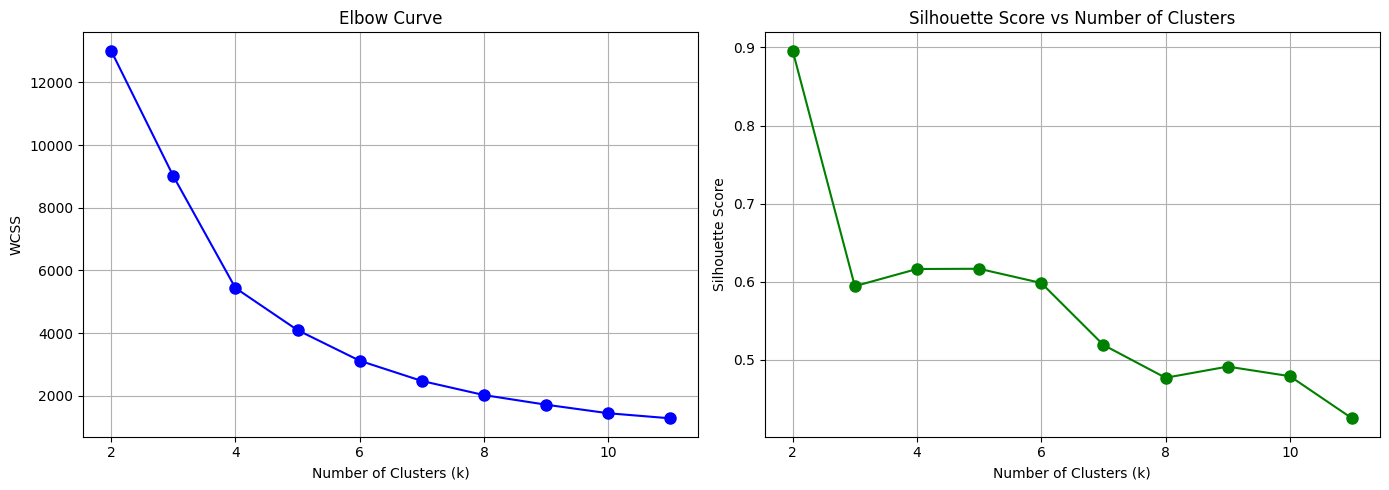

In [42]:
## comparing / Analysing Elbo curve with silhouette_score curve..

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Curve
ax[0].plot(K, wcss, 'bo-', markersize=8)
ax[0].set_title('Elbow Curve')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('WCSS')
ax[0].grid(True)

# Silhouette Score Plot
ax[1].plot(K, sill_scores, 'go-', markersize=8)
ax[1].set_title('Silhouette Score vs Number of Clusters')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid(True)

plt.tight_layout()
plt.show()


✨ No. of clusters Depends on  Objective:

Scenario	Recommendation

🧬 We want natural, well-separated customer groups	Choose k = 2 (silhouette is better)
📊 You want more granular customer segmentation for marketing, RFM strategy, or targeting	Choose k = 4 (elbow is acceptable)

🎯 Business teams want a balance between interpretability and actionability	Use k = 3 or 4, then analyze the cluster profiles

In [43]:

 ## DBSCAN model ...application

from sklearn.cluster import DBSCAN


# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=2)
labels = dbscan.fit_predict(rfm_scaled)

# Get unique cluster labels (excluding noise)
unique_labels = set(labels)
if -1 in unique_labels:
    unique_labels.remove(-1)

# Count the number of clusters
n_clusters = len(unique_labels)

print(f"Cluster labels: {labels}")
print(f"Estimated number of clusters: {n_clusters}")
print(silhouette_score(rfm_scaled,labels))

Cluster labels: [-1  0  0 ...  0  0  0]
Estimated number of clusters: 7
0.7102187097627654


## 5. Run Clustering (KMeans with 4 clusters)

### 5.1 Add labels to the RFM dataframe using Kmeans model

In [44]:
kmeans = KMeans(
    n_clusters=4,           # Determined via Elbow/Silhouette
    init='k-means++',       # Better initialization for faster, stable convergence
    n_init=40,              # Try 20 different initial centroids to avoid local minima
    max_iter=500,           # Higher iteration count to ensure convergence
    random_state=42,        # Reproducibility
    algorithm='lloyd'       # Default algorithm, good for RFM-like dense data
    )
kmeans_labels = kmeans.fit_predict(rfm_scaled)

# Add labels to the RFM dataframe
rfm['Cluster'] = kmeans_labels



In [45]:
## silhouette_scores
kmeans_score = silhouette_score(rfm_scaled, kmeans_labels)
kmeans_score

np.float64(0.6162275299061803)

### 5.2 Interpret Clusters: Label Using Business Rules


In [46]:
# ➤ First, get mean RFM per cluster

rfm_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

print(rfm_profile)

         Recency  Frequency  Monetary
Cluster                              
0           43.7        3.7    1353.6
1          248.1        1.6     478.8
2            7.4       82.5  127188.0
3           15.5       22.3   12690.5


### 5.3  Step-by-Step: Robust Segment Labeling for rfm_profile

In [47]:

# 1️⃣ Calculate Quantile Thresholds
# These help interpret cluster behaviors relative to the global customer base.

# Step 1: Calculate quantiles
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])

r_q = quantiles['Recency'].to_dict()
f_q = quantiles['Frequency'].to_dict()
m_q = quantiles['Monetary'].to_dict()

# Step 2: Label function using 0.25, 0.5, and 0.75
def label_segment(row):
    R, F, M = row['Recency'], row['Frequency'], row['Monetary']

    if R <= r_q[0.25] and F >= f_q[0.75] and M >= m_q[0.75]:
        return 'High-Value'
    elif R >= r_q[0.75] and F <= f_q[0.25] and M <= m_q[0.25]:
        return 'At-Risk'
    elif R <= r_q[0.5] and F >= f_q[0.5] and M >= m_q[0.5]:
        return 'Regular'
    else:
        return 'Occasional'







# 3️⃣ Apply It on rfm_profile (RFM Averages per Cluster)

# This ensures each cluster is labeled using logical and statistically derived cutoffs. It prevents missed or misclassified segments due to uneven data distribution.
rfm_profile['Segment Label'] = rfm_profile.apply(label_segment, axis=1)



In [48]:
rfm_profile

,Recency,Frequency,Monetary,Segment Label
Cluster,,,,
0,43.7,3.7,1353.6,Regular
1,248.1,1.6,478.8,Occasional
2,7.4,82.5,127188.0,High-Value
3,15.5,22.3,12690.5,High-Value


 ###  📌 Final Segment Logic Summary


| Cluster   | Characteristics  | Segment Label| Logic|
|:---------|:--------:|---------:|---------:|
| High R , High F, High M| Regular frequent, recent,and big spenders |High-value|Recent purchases, frequent orders, and high spending (R↓, F↑, M↑)|
| Medium F, Medium M    |  Steady purchasers but not premium        | Regular  |Medium to good spending and frequency (F↑, M↑)|
| Low F, Low M, older R |Rare, occasional purchases  |Occasional|Neither frequent nor recent, moderate spending|
| High R, Low F, Low M  |Haven’t purchased in a long time           |  At-Risk  |Long time since last purchase, low spending, low frequency (R↑, F↓, M↓)|



In [49]:
## Sssignmening Charesterics to the Cluster l;abels..
def Assigning_charasterics_to_label(row):
  label= row['Segment Label']

  if label=='High-Value':
    return 'Regular frequent, recent,and big spenders'
  elif label=='Regular':
    return 'Steady purchasers but not premium'
  elif label=='Occasional':
    return 'Rare, occasional purchases'
  elif label=='At-Risk':
    return 'Haven’t purchased in a long time'
  else :
    return 'Other'


rfm_profile['Characteristics']=rfm_profile.apply(Assigning_charasterics_to_label,axis=1)

In [50]:
rfm_profile

,Recency,Frequency,Monetary,Segment Label,Characteristics
Cluster,,,,,
0,43.7,3.7,1353.6,Regular,Steady purchasers but not premium
1,248.1,1.6,478.8,Occasional,"Rare, occasional purchases"
2,7.4,82.5,127188.0,High-Value,"Regular frequent, recent,and big spenders"
3,15.5,22.3,12690.5,High-Value,"Regular frequent, recent,and big spenders"


In [51]:
rfm

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,3
1,12347.0,2,7,4310.00,0
2,12348.0,75,4,1797.24,0
3,12349.0,19,1,1757.55,0
4,12350.0,310,1,334.40,1
...,...,...,...,...,...
4333,18280.0,278,1,180.60,1
4334,18281.0,181,1,80.82,1
4335,18282.0,8,2,178.05,0
4336,18283.0,4,16,2045.53,3


In [52]:
## merging rfm with rfm_profiles..
safe_df=rfm

# Already assigned during KMeans or clustering
# rfm['Cluster'] should exist
# rfm_profile should have index as Cluster (or a 'Cluster' column)
# rfm_profile = rfm_profile.reset_index()  # if 'Cluster' is the index

# Merge on 'Cluster'
rfm_merged = pd.merge(rfm, rfm_profile, on='Cluster', how='left')


#Renaming the Columns names
rfm_merged=rfm_merged.rename(columns={'Recency_x': 'Recency',
                                       'Frequency_x':'Frequency',
                                       'Monetary_x':'Monetary',
                                       'Recency_y': 'Cluster_Recency_Mean',
                                      'Frequency_y': 'Cluster_Frequency_Mean',
                                      'Monetary_y':'Cluster_Monetary_Mean'
                                      })

rfm=rfm_merged
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Cluster_Recency_Mean,Cluster_Frequency_Mean,Cluster_Monetary_Mean,Segment Label,Characteristics
0,12346.0,326,1,77183.60,3,15.5,22.3,12690.5,High-Value,"Regular frequent, recent,and big spenders"
1,12347.0,2,7,4310.00,0,43.7,3.7,1353.6,Regular,Steady purchasers but not premium
2,12348.0,75,4,1797.24,0,43.7,3.7,1353.6,Regular,Steady purchasers but not premium
3,12349.0,19,1,1757.55,0,43.7,3.7,1353.6,Regular,Steady purchasers but not premium
4,12350.0,310,1,334.40,1,248.1,1.6,478.8,Occasional,"Rare, occasional purchases"


## 6. Visualizing the clusters using a scatter plot or 3D plot of RFM scores.

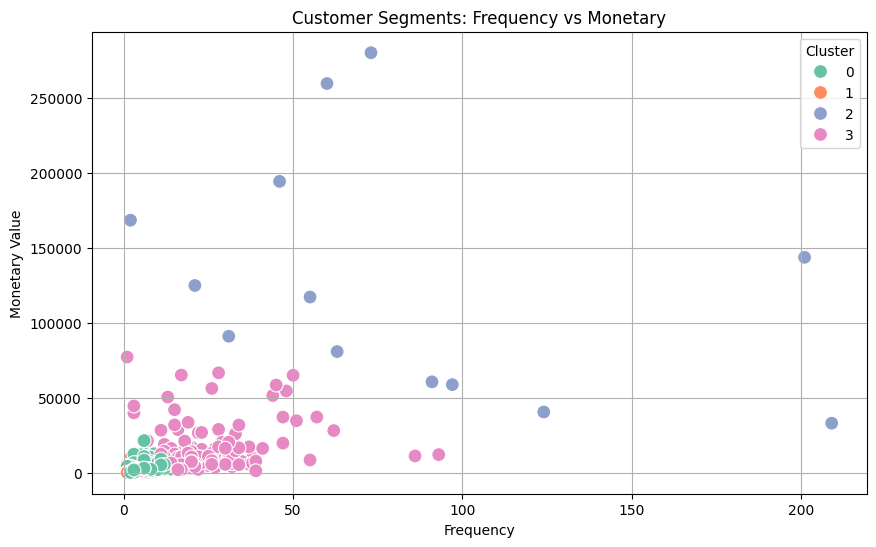

In [53]:
#  2D Scatter Plot (using Seaborn or Matplotlib)

#  Frequency vs Monetary colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments: Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


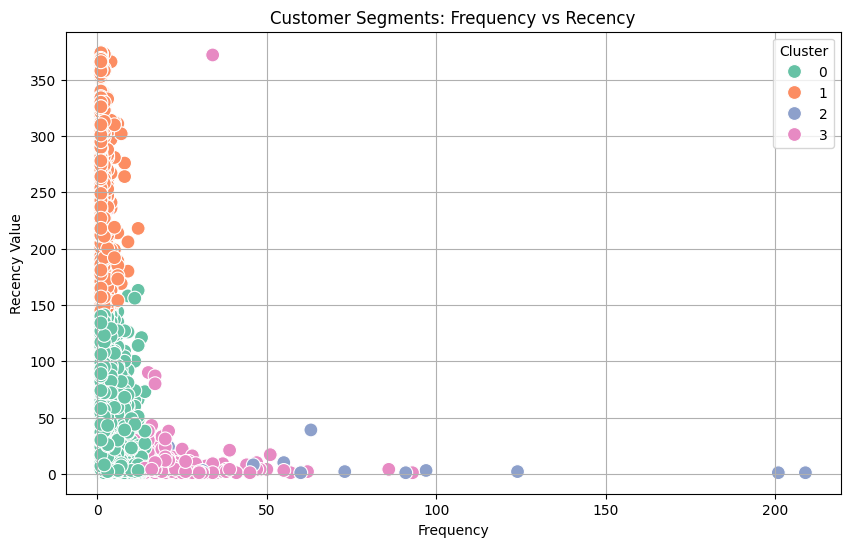

In [54]:
#  2D Scatter Plot (using Seaborn or Matplotlib)

#  Frequency vs Recency colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Recency', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments: Frequency vs Recency')
plt.xlabel('Frequency')
plt.ylabel('Recency Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


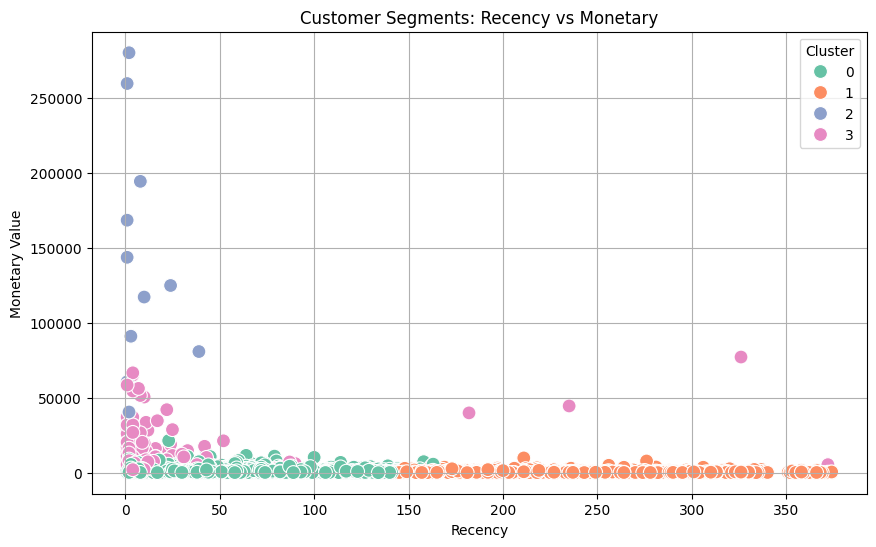

In [55]:
#  2D Scatter Plot (using Seaborn or Matplotlib)

#  Recency vs Monetary colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments: Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [56]:
# 3D Scatter Plot (using Plotly)
import plotly.express as px

fig = px.scatter_3d(
    rfm_merged,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Segment Label',  # Or use 'Cluster'
    symbol='Segment Label',
    size_max=10,
    opacity=0.7,
    title='Interactive 3D RFM Cluster Visualization'
)

fig.update_traces(marker=dict(size=3))
fig.update_layout(scene=dict(
    xaxis_title='Recency',
    yaxis_title='Frequency',
    zaxis_title='Monetary'
))

fig.show()



## ▶ Key Insights from a 3D RFM Plot
1. High-Value Loyal Customers

 * Cluster with low Recency, high Frequency, high Monetary.

 * These are your best customers — ideal for loyalty rewards or VIP programs.

2. At-Risk Customers

 * High Recency, but used to have high Frequency and Monetary.

 * Target them with win-back offers before they churn.

3. New or One-Time Buyers

 * Low Frequency, low Monetary, and medium Recency.

 * Opportunity to nurture them into regular buyers with first-time offers.

4. Loyal But Low Spenders

 * High Frequency, low Monetary — consistent buyers, but of low-value items.

 * Try upselling or bundling to increase order value.

5. Big Spenders, Low Frequency

 * Low Frequency, high Monetary.

 * These may be gift buyers or seasonal shoppers — re-engage during peak times.



In [57]:
rfm_profile

,Recency,Frequency,Monetary,Segment Label,Characteristics
Cluster,,,,,
0,43.7,3.7,1353.6,Regular,Steady purchasers but not premium
1,248.1,1.6,478.8,Occasional,"Rare, occasional purchases"
2,7.4,82.5,127188.0,High-Value,"Regular frequent, recent,and big spenders"
3,15.5,22.3,12690.5,High-Value,"Regular frequent, recent,and big spenders"


## 📊 Grouped Bar Plot of RFM by Cluster

In [58]:
# # Melt for seaborn
# rfm_melted = rfm_profile.melt(id_vars='Cluster', var_name='RFM_Metric', value_name='Average')

# # Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(data=rfm_melted, x='Cluster', y='Average', hue='RFM_Metric', palette='Set2')
# plt.title('Average RFM Scores by Cluster')
# plt.ylabel('Average Value')
# plt.xlabel('Cluster')
# plt.legend(title='RFM Metric')
# plt.tight_layout()
# plt.show()

## 7.Saving the best performing model for streamlit usage

In [59]:
# Testing Best performing model


# rfm_scaled_tested = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(
    n_clusters=4,           # Determined via Elbow/Silhouette
    init='k-means++',       # Better initialization for faster, stable convergence
    n_init=40,              # Try 20 different initial centroids to avoid local minima
    max_iter=500,           # Higher iteration count to ensure convergence
    random_state=42,        # Reproducibility
    algorithm='lloyd'       # Default algorithm, good for RFM-like dense data
    )
kmeans_labels_tested = kmeans.fit_predict(rfm_scaled)
kmeans_score = silhouette_score(rfm_scaled, kmeans_labels_tested)

# DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(rfm_scaled)
dbscan_score = silhouette_score(rfm_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# Agglomerative
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(rfm_scaled)
agg_score = silhouette_score(rfm_scaled, agg_labels)

print(f"kmeans_score :{kmeans_score:.2f}")
print(f"dbscan_score :{dbscan_score:.2f}")
print(f"agg_score :{agg_score:.2f}")
print(len(set(kmeans_labels_tested)))
print(len(set(dbscan_labels)))
print(len(set(agg_labels)))

kmeans_score :0.62
dbscan_score :0.86
agg_score :0.61
4
2
4


#  👁️ Observations :
# We go with Kmeans clustring model with 0.39 score instead of DBSCAN
#beacause DBSCAN has to much noice acc to our data and we need 4 clusters according to business neds


In [60]:
# Saving KMeans Model and scaler for streamlit usag

path='/content/drive/MyDrive/Labmentix intern projects/shopper spectrum'
import joblib
joblib.dump(scaler, path+'/rfm_scaler.joblib')
joblib.dump(kmeans, path+'/kmeans_rfm_model.joblib')


['/content/drive/MyDrive/Labmentix intern projects/shopper spectrum/kmeans_rfm_model.joblib']

In [61]:
model=joblib.load(path+'/kmeans_rfm_model.joblib')
print(silhouette_score(rfm_scaled,model.predict(rfm_scaled)))

0.6162275299061803


## 📌8. Recommendation System Approach:

* Use Item-based Collaborative Filtering

* Compute cosine similarity (or another similarity metric) between products based on purchase history (CustomerID–StockCode matrix)

* Return top 5 similar products to the entered product name


###
 Collaborative filtering methods are a class of techniques used in recommender systems to predict a user's interest in items based on the preferences of other users. These methods primarily fall into two categories:

1. Memory-Based Collaborative Filtering (Neighborhood-Based):

  * User-Based Collaborative Filtering:
This approach recommends items to a target user based on the preferences of other users who have similar tastes. It identifies a "neighborhood" of users with similar rating patterns and then recommends items that these similar users have liked but the target user has not yet experienced.

  * ✅  Item-Based Collaborative Filtering:
This method focuses on the similarity between items. It recommends items to a user that are similar to items the user has already liked. The similarity between items is determined by how other users have rated them.

2. Model-Based Collaborative Filtering:

  * Latent Factor Models (e.g., Matrix Factorization, SVD):
These methods aim to discover underlying "latent factors" that explain the observed user-item interactions. They decompose the user-item interaction matrix into lower-dimensional matrices representing user and item features, which can then be used to predict missing ratings.

  * Other Machine Learning Models:
This category includes using various machine learning and data mining techniques, such as decision trees, rule-based models, or Bayesian models, to build predictive models for recommendations.

  * Deep Learning-Based CF:
This involves leveraging deep learning architectures, such as neural networks, to learn complex representations of users and items, improving recommendation accuracy and handling challenges like data sparsity and cold start problems.


   Key Concepts in Collaborative Filtering:

* Similarity Metrics:
Algorithms use various metrics to quantify similarity between users or items, such as Cosine Similarity or Pearson Correlation Coefficient.

* User-Item Matrix:
A fundamental data structure representing user ratings or interactions with items, often sparse due to unrated items.

Predictions/Recommendations:
Collaborative filtering can generate numerical predictions (e.g., a predicted rating) or a ranked list of recommended items.
AI responses may include mistakes. Learn more



#### 8.1 Build a Customer-Product Matrix


In [62]:
# Filter meaningful transactions (e.g., positive quantity)
df_filtered = online_retail_df[online_retail_df['Quantity'] > 0]

# Pivot table: rows = CustomerID, columns = Product, values = Quantity By using DF.pivot_table
customer_product_matrix = df_filtered.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)


####  8.2 Compute Item-Item Cosine Similarity

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose so products are rows
product_similarity = cosine_similarity(customer_product_matrix.T)
# Convert to DataFrame for labeling
product_sim_df = pd.DataFrame(product_similarity,
                              index=customer_product_matrix.columns,
                              columns=customer_product_matrix.columns)


In [64]:
# Convert to DataFrame for labeling
product_similarity_int_indexed_metrix = pd.DataFrame(product_similarity,
                              columns=customer_product_matrix.columns)


In [65]:
#3 Saving product similarity metrix(product_similarity_int_indexed_metrix) for product recommendations..
joblib.dump(product_similarity_int_indexed_metrix,path+'/product_similarity_int_indexed_metrix.joblib')

['/content/drive/MyDrive/Labmentix intern projects/shopper spectrum/product_similarity_int_indexed_metrix.joblib']

In [66]:
# Loading product_similarity_int_indexed_metrix metrix
sim_metrix=joblib.load(open(path+'/product_similarity_int_indexed_metrix.joblib','rb'))


In [67]:
#3 Saving product similarity metrix for product recommendations..
# product_sim_df.to_csv(path+'/product_sim_df.csv')

In [68]:
 # https://shopper-app-chandraprakashkahar.streamlit.app/

### Streamlit App link https://shopper-app-chandraprakashkahar.streamlit.app/

# ✅ Conclusion


This project presents a comprehensive web-based solution for customer intelligence and product recommendation using RFM (Recency, Frequency, Monetary) analysis and product similarity metrics. Built with a focus on usability and real-time insights, the application combines the power of machine learning with an intuitive interface through Streamlit.


## Key features include:


* Customer Segmentation: Using KMeans clustering on scaled RFM values, customers are segmented into actionable categories such as High-Value, Regular, Occasional, and At-Risk. This empowers businesses to tailor marketing strategies and prioritize retention efforts.

* Product Recommendation: By leveraging a precomputed product similarity matrix, users can receive top-5 similar product suggestions, facilitating cross-sell and upsell opportunities.



## Technologies used:

* scikit-learn for modeling and clustering

* joblib for efficient model persistence

* Streamlit for front-end deployment and interactivity

* Pandas and NumPy for data manipulation



## 📊 Business Impact
This solution bridges the gap between data analytics and business strategy by providing:

* Enhanced customer targeting and engagement

* Increased customer lifetime value through strategic segmentation

* Smarter product discovery and increased cart value

## 🚀 Next Steps
* Integration with live customer databases or APIs

* Deploy to scalable cloud platforms (e.g., AWS, Streamlit Cloud, Heroku)

* Extend model performance with more features or deep learning methods

* Add authentication and session management for multi-user use

